In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
DATA_PATH = '/Users/liauzhanyi/Desktop/CS4243/project/data'
TRAIN_DATASET_PATH = f'{DATA_PATH}/train'
TEST_DATASET_PATH = f'{DATA_PATH}/test'
OUTPUT_PATH = f'{DATA_PATH}/segmented_train'
SEGMENTED_TRAIN_DATASET_PATH = f'{DATA_PATH}/segmented_train'
AUGMENTED_SEGMENTED_TRAIN_DATASET_PATH = f'{DATA_PATH}/augmented_segmented_train'

IMG_HEIGHT, IMG_WIDTH = 80, 400

<Figure size 3000x3000 with 0 Axes>

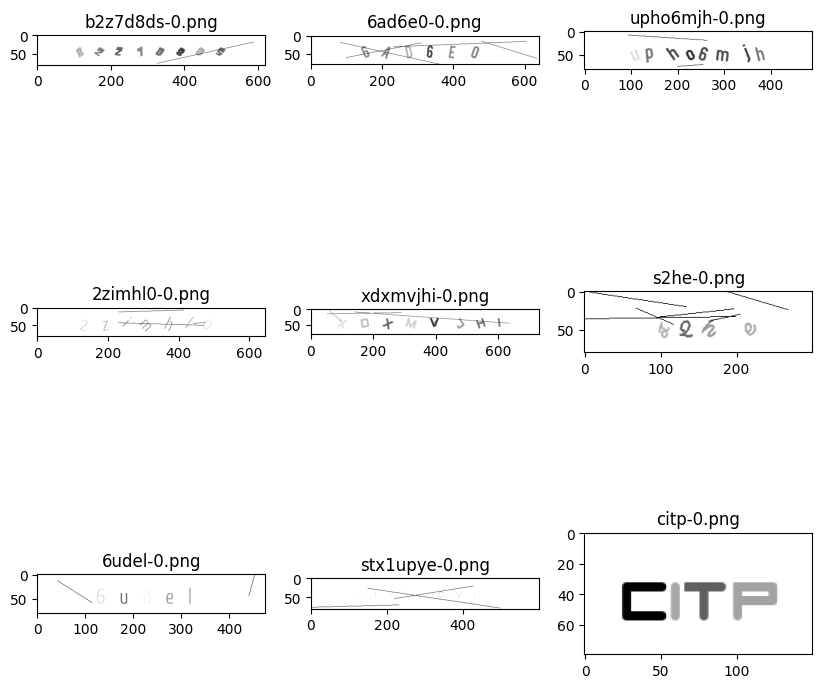

In [3]:
SAMPLE_IMAGES = [os.listdir(TRAIN_DATASET_PATH)[i] for i in range(9)]

plt.figure(figsize=(30, 30))
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = cv2.imread(f'{TRAIN_DATASET_PATH}/{SAMPLE_IMAGES[i]}', cv2.IMREAD_GRAYSCALE)
    ax.imshow(img, cmap='gray')
    ax.set_title(SAMPLE_IMAGES[i])
plt.show()

<Figure size 3000x3000 with 0 Axes>

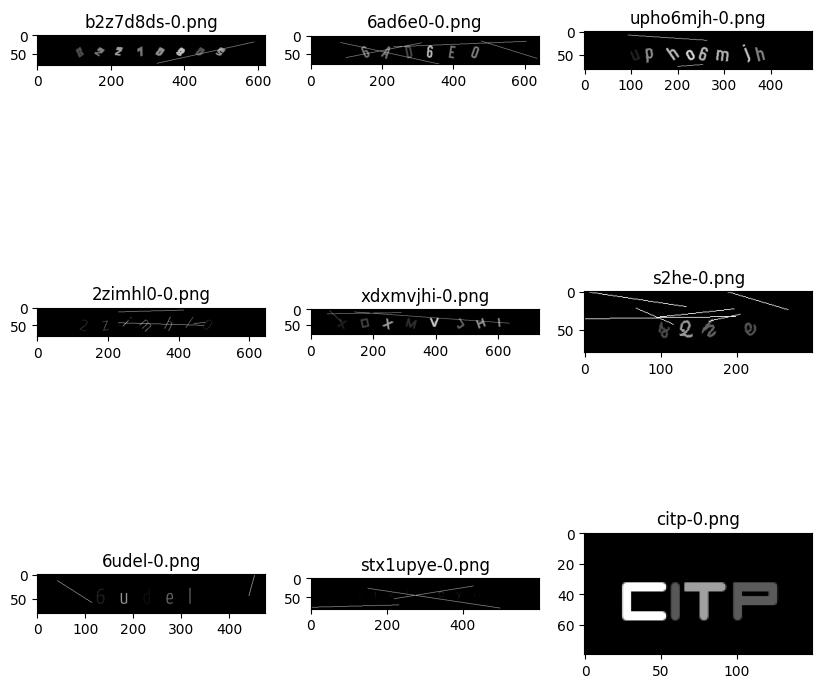

In [4]:
## Invert the image
plt.figure(figsize=(30, 30))
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = cv2.imread(f'{TRAIN_DATASET_PATH}/{SAMPLE_IMAGES[i]}', cv2.IMREAD_GRAYSCALE)
    img = cv2.bitwise_not(img)
    ax.imshow(img, cmap='gray')
    ax.set_title(SAMPLE_IMAGES[i])
plt.show()

<Figure size 3000x3000 with 0 Axes>

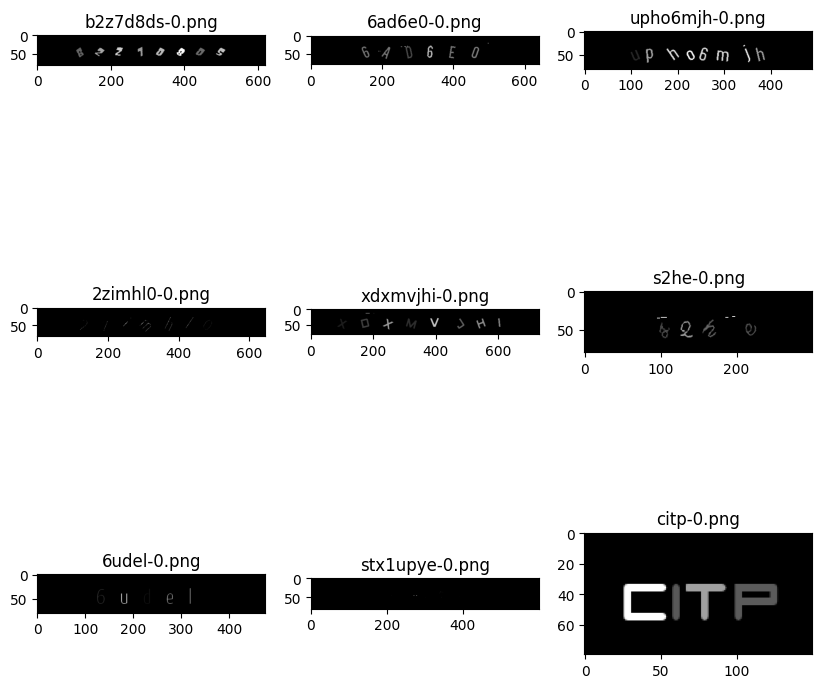

<Figure size 3000x3000 with 0 Axes>

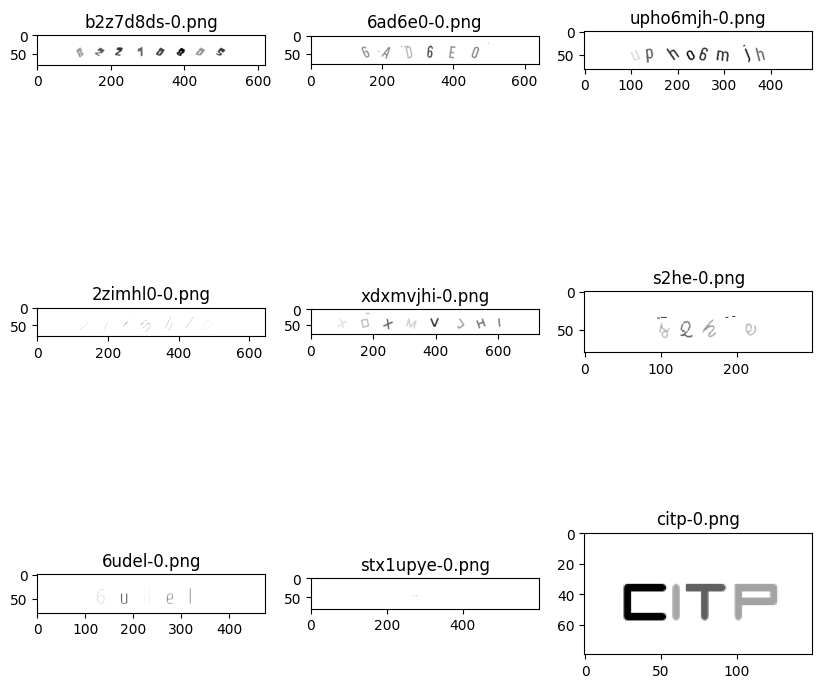

In [5]:
def dilate(image, kernel_size=(3, 3)):
    # Remove noise via dilation
    kernel = np.ones(kernel_size, np.uint8)
    dilation = cv2.dilate(image, kernel, iterations=1)
    return dilation

def erode(image, kernel_size=(3, 3)):
    # Remove noise via dilation
    kernel = np.ones(kernel_size, np.uint8)
    erosion = cv2.erode(image, kernel, iterations=1)
    return erosion

plt.figure(figsize=(30, 30))
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = cv2.imread(f'{TRAIN_DATASET_PATH}/{SAMPLE_IMAGES[i]}', cv2.IMREAD_GRAYSCALE)
    img = cv2.bitwise_not(img)
    img = erode(img, kernel_size=(2, 2)) ## (3, 3) is over kill (can plot to see) 
    ax.imshow(img, cmap='gray')
    ax.set_title(SAMPLE_IMAGES[i])
plt.show()

plt.figure(figsize=(30, 30))
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = cv2.imread(f'{TRAIN_DATASET_PATH}/{SAMPLE_IMAGES[i]}', cv2.IMREAD_GRAYSCALE)
    img = cv2.bitwise_not(img)
    img = erode(img, kernel_size=(2, 2))
    img = cv2.bitwise_not(img)
    ax.imshow(img, cmap='gray')
    ax.set_title(SAMPLE_IMAGES[i])
plt.show()

<Figure size 3000x3000 with 0 Axes>

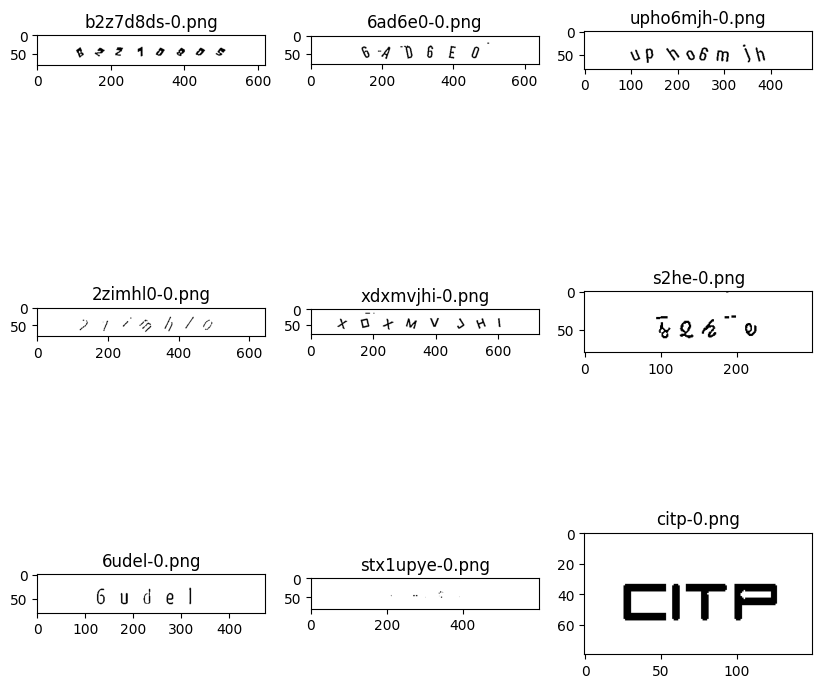

<Figure size 3000x3000 with 0 Axes>

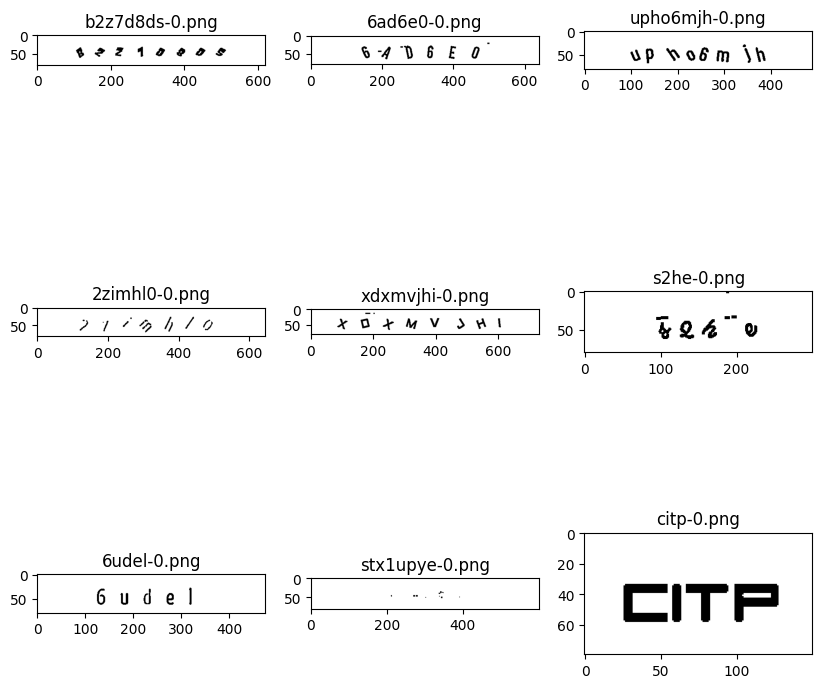

<Figure size 3000x3000 with 0 Axes>

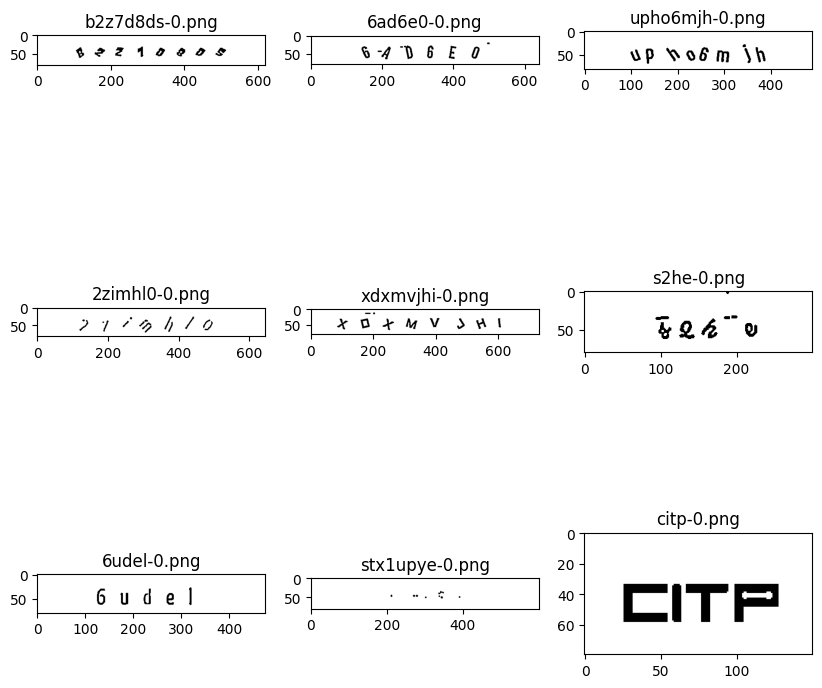

<Figure size 3000x3000 with 0 Axes>

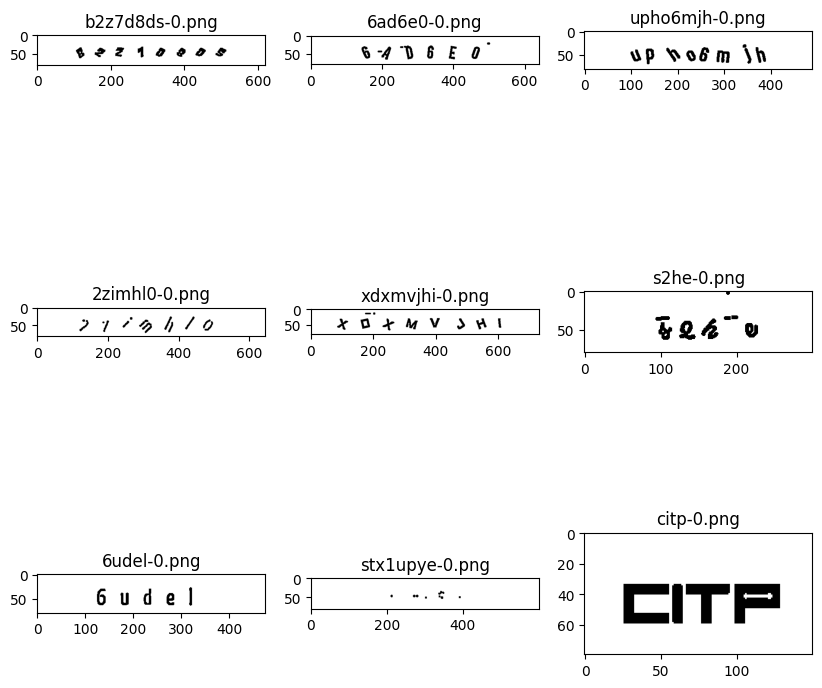

In [6]:
def gaussian_thresholding(image, kernel=(5, 5), block_size=11, C=2):
    # Use gaussian blur to make characters thicker before thresholding 
    blur = cv2.GaussianBlur(image, kernel, 0)
    thresholded_image = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, blockSize=block_size, C=C
    )
    return thresholded_image

## Display sample images
plt.figure(figsize=(30, 30))
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = cv2.imread(f'{TRAIN_DATASET_PATH}/{SAMPLE_IMAGES[i]}', cv2.IMREAD_GRAYSCALE)
    img = cv2.bitwise_not(img)
    img = erode(img, kernel_size=(2, 2))
    img = cv2.bitwise_not(img)
    img = gaussian_thresholding(img, kernel=(5, 5), block_size=11, C=2)
    ax.imshow(img, cmap='gray')
    ax.set_title(SAMPLE_IMAGES[i])
plt.show()

plt.figure(figsize=(30, 30))
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = cv2.imread(f'{TRAIN_DATASET_PATH}/{SAMPLE_IMAGES[i]}', cv2.IMREAD_GRAYSCALE)
    img = cv2.bitwise_not(img)
    img = erode(img, kernel_size=(2, 2))
    img = cv2.bitwise_not(img)
    img = gaussian_thresholding(img, kernel=(5, 5), block_size=11, C=2)
    img = erode(img, kernel_size=(2, 2))
    ax.imshow(img, cmap='gray')
    ax.set_title(SAMPLE_IMAGES[i])
plt.show()

plt.figure(figsize=(30, 30))
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = cv2.imread(f'{TRAIN_DATASET_PATH}/{SAMPLE_IMAGES[i]}', cv2.IMREAD_GRAYSCALE)
    img = cv2.bitwise_not(img)
    img = erode(img, kernel_size=(2, 2))
    img = cv2.bitwise_not(img)
    img = gaussian_thresholding(img, kernel=(5, 5), block_size=11, C=2)
    img = erode(img, kernel_size=(2, 2))
    img = gaussian_thresholding(img, kernel=(5, 5), block_size=11, C=2)
    ax.imshow(img, cmap='gray')
    ax.set_title(SAMPLE_IMAGES[i])
plt.show()

plt.figure(figsize=(30, 30))
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    img = cv2.imread(f'{TRAIN_DATASET_PATH}/{SAMPLE_IMAGES[i]}', cv2.IMREAD_GRAYSCALE)
    ## preprocess start
    img = cv2.bitwise_not(img)
    img = erode(img, kernel_size=(2, 2))
    img = cv2.bitwise_not(img)
    img = gaussian_thresholding(img, kernel=(5, 5), block_size=11, C=2)
    img = erode(img, kernel_size=(2, 2))
    img = gaussian_thresholding(img, kernel=(5, 5), block_size=11, C=2)
    img = erode(img, kernel_size=(2, 2))
    ## preprocess end
    ax.imshow(img, cmap='gray')
    ax.set_title(SAMPLE_IMAGES[i])
plt.show()

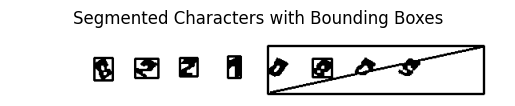

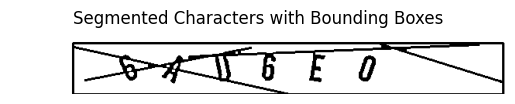

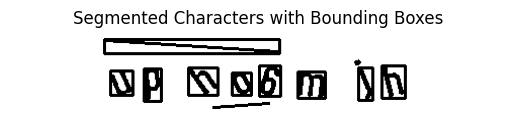

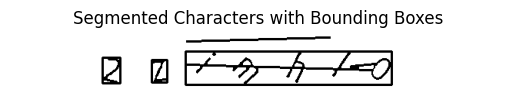

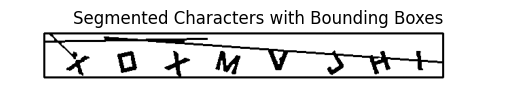

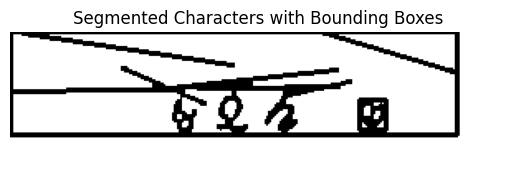

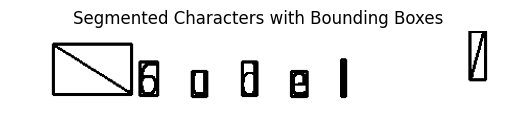

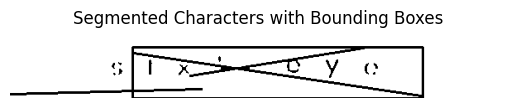

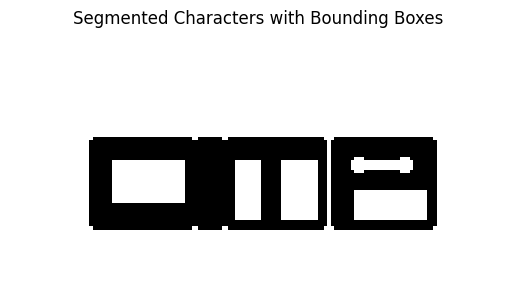

In [12]:
# def calculate_iou(box1, box2):
#     """Calculate Intersection over Union (IoU) between two bounding boxes."""
#     x1 = max(box1[0], box2[0])
#     y1 = max(box1[1], box2[1])
#     x2 = min(box1[0] + box1[2], box2[0] + box2[2])
#     y2 = min(box1[1] + box1[3], box2[1] + box2[3])
    
#     # Calculate the area of overlap (intersection)
#     intersection_area = max(0, x2 - x1) * max(0, y2 - y1)
    
#     # Calculate the area of both bounding boxes
#     box1_area = box1[2] * box1[3]
#     box2_area = box2[2] * box2[3]
    
#     # Calculate IoU
#     iou = intersection_area / float(box1_area + box2_area - intersection_area)
#     return iou

def combine_boxes(box1, box2):
    """Combine two overlapping boxes into a single box."""
    x1 = min(box1[0], box2[0])
    y1 = min(box1[1], box2[1])
    x2 = max(box1[0] + box1[2], box2[0] + box2[2])
    y2 = max(box1[1] + box1[3], box2[1] + box2[3])
    
    # Return combined box
    return (x1, y1, x2 - x1, y2 - y1)

def boxes_overlap(box1, box2):
    """Check if two boxes overlap."""
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    return not (x1 + w1 < x2 or x2 + w2 < x1 or y1 + h1 < y2 or y2 + h2 < y1)

def non_max_suppression(boxes):
    """Combine overlapping boxes."""
    if len(boxes) == 0:
        return []

    boxes = sorted(boxes, key=lambda box: box[0])  # Sort by x-coordinate
    combined_boxes = []

    while boxes:
        current_box = boxes.pop(0)
        to_merge = []

        # Check for boxes that overlap with current_box and merge them
        for box in boxes:
            if boxes_overlap(current_box, box):  # Check if they overlap
                to_merge.append(box)

        # Combine all overlapping boxes into one
        for box in to_merge:
            current_box = combine_boxes(current_box, box)
            boxes.remove(box)

        combined_boxes.append(current_box)

    return combined_boxes

def extract_contours(image, min_height=10):
    """Extract contours and return bounding boxes."""
    inverted_image = cv2.bitwise_not(image)
    contours, _ = cv2.findContours(inverted_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Extract bounding boxes and filter by height
    bounding_boxes = [cv2.boundingRect(contour) for contour in contours if cv2.boundingRect(contour)[3] > min_height]

    return bounding_boxes

def segment_characters(image, iou_threshold=0.5):
    """Segment the CAPTCHA image into individual characters using NMS."""
    # Step 1: Extract bounding boxes from contours
    bounding_boxes = extract_contours(image)

    # Step 2: Apply Non-Maximum Suppression (NMS) to remove overlapping boxes
    nms_boxes = non_max_suppression(bounding_boxes)

    # Step 3: Extract character images based on the final bounding boxes
    char_images = [image[y:y+h, x:x+w] for (x, y, w, h) in nms_boxes]

    # Step 4: Sort character images based on their x-coordinate for correct order
    char_images = sorted(char_images, key=lambda img: img.shape[1])

    return nms_boxes, char_images

def plot_bounding_boxes(image, boxes):
    """Plot the image with bounding boxes."""
    image_copy = image.copy()

    # Draw each bounding box on the image
    for (x, y, w, h) in boxes:
        cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green boxes

    # Convert BGR to RGB for plotting
    image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
    
    # Plot the image with bounding boxes
    plt.imshow(image_copy)
    plt.title("Segmented Characters with Bounding Boxes")
    plt.axis('off')
    plt.show()

def plot_segmented_characters(char_images):
    """Plot the segmented characters individually."""
    fig, axes = plt.subplots(1, len(char_images), figsize=(10, 3))
    for i, char_img in enumerate(char_images):
        axes[i].imshow(char_img, cmap='gray')
        axes[i].axis('off')
    plt.show()

# def segment_characters(image, color_img):
#     inverted_image = cv2.bitwise_not(image)
#     contours, _ = cv2.findContours(inverted_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     char_images = []
    
#     for contour in contours:
#         x, y, w, h = cv2.boundingRect(contour)
#         if h > 10:  # Filter out small noise based on height
#             # Crop the character
#             char_img = image[y:y+h, x:x+w]
#             char_images.append((x, char_img))
            
#             # Draw a rectangle (bounding box) on the original image for visualization
#             cv2.rectangle(color_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
#     char_images = sorted(char_images, key=lambda c: c[0])
    
#     # Plot the image with bounding boxes using matplotlib
#     plt.figure(figsize=(10, 6))
#     plt.imshow(color_img, cmap='gray')
#     plt.title(SAMPLE_IMAGES[i])
#     plt.show()
    
#     return [char[1] for char in char_images]

## Display segmented characters ORIGINAL
for i in range(len(SAMPLE_IMAGES)):
    img = cv2.imread(f'{TRAIN_DATASET_PATH}/{SAMPLE_IMAGES[i]}', cv2.IMREAD_GRAYSCALE)
    color_img = cv2.imread(f'{TRAIN_DATASET_PATH}/{SAMPLE_IMAGES[i]}', cv2.IMREAD_COLOR)
    img = gaussian_thresholding(img)
    img = erode(img)
    img = dilate(img)
    boxes, characters = segment_characters(img)
    plot_bounding_boxes(img, boxes)
    # plot_segmented_characters(characters)


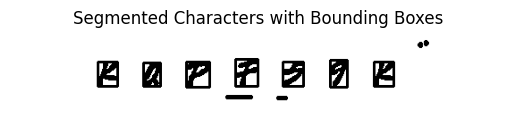

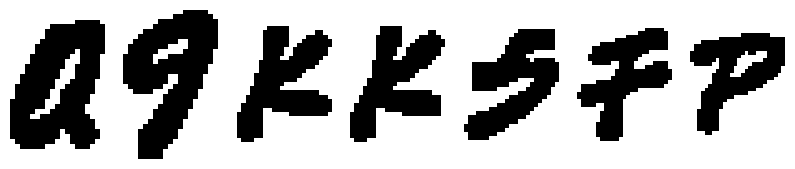

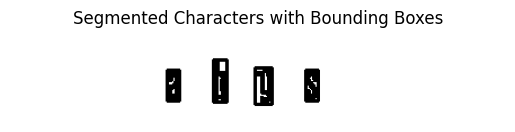

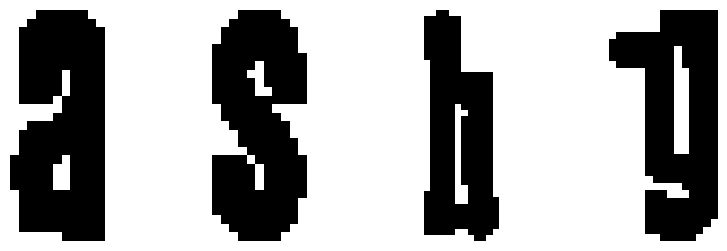

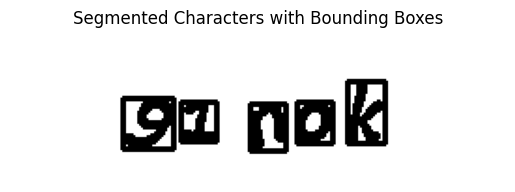

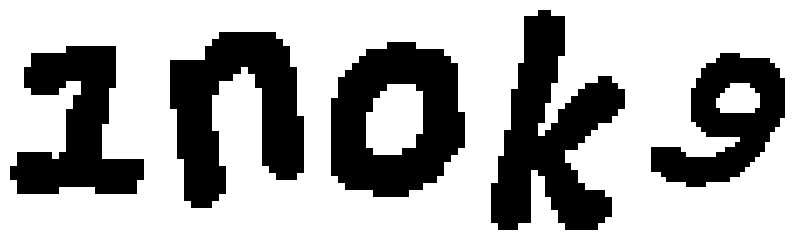

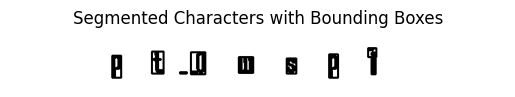

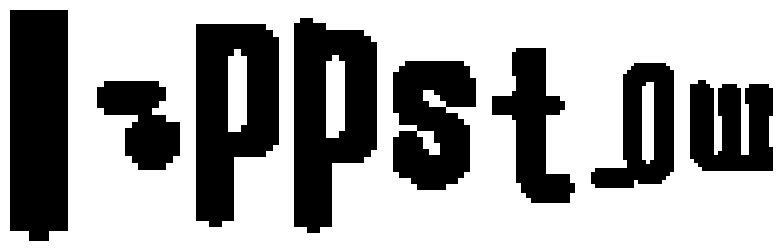

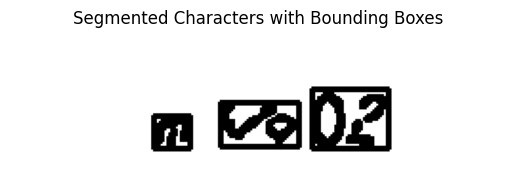

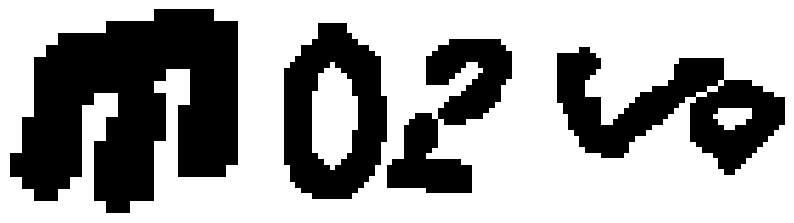

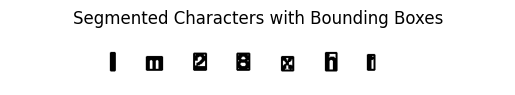

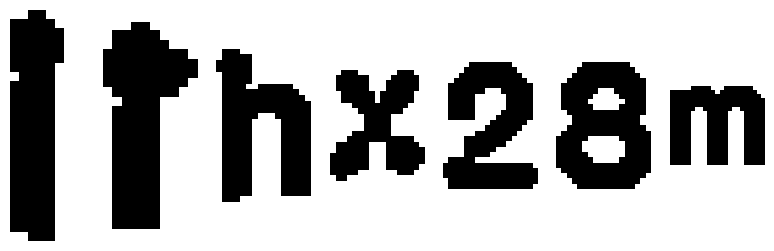

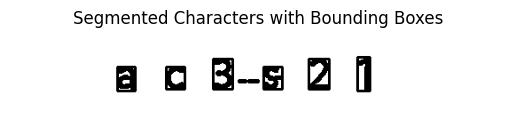

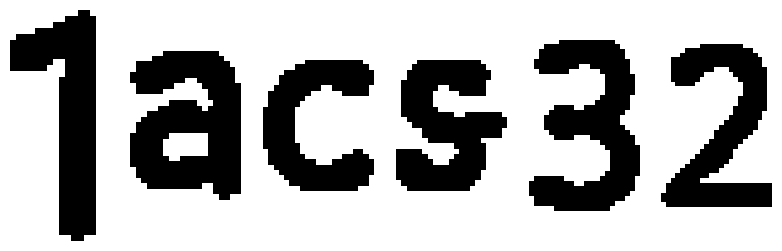

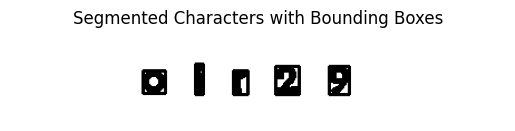

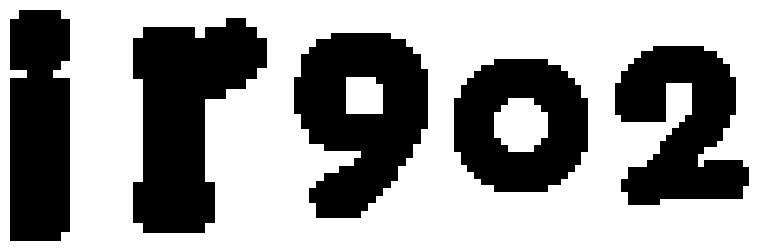

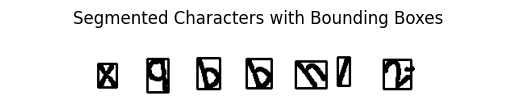

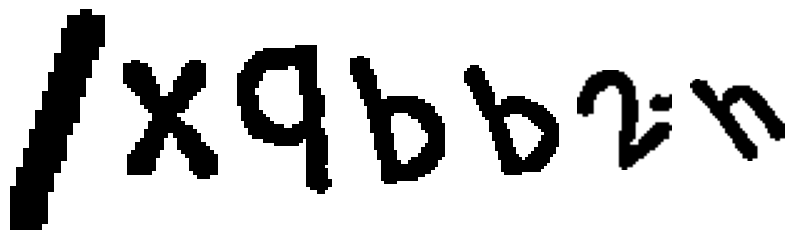

In [16]:
SAMPLE_IMAGES_2 = [os.listdir(TRAIN_DATASET_PATH)[i] for i in range(123, 132)]
for i in range(len(SAMPLE_IMAGES)):
    img = cv2.imread(f'{TRAIN_DATASET_PATH}/{SAMPLE_IMAGES_2[i]}', cv2.IMREAD_GRAYSCALE)
    color_img = cv2.imread(f'{TRAIN_DATASET_PATH}/{SAMPLE_IMAGES_2[i]}', cv2.IMREAD_COLOR)
    ## preprocess start
    img = cv2.bitwise_not(img)
    img = erode(img, kernel_size=(2, 2))
    img = cv2.bitwise_not(img)
    img = gaussian_thresholding(img, kernel=(5, 5), block_size=11, C=2)
    img = erode(img, kernel_size=(2, 2))
    img = gaussian_thresholding(img, kernel=(5, 5), block_size=11, C=2)
    img = erode(img, kernel_size=(2, 2))
    ## preprocess end
    boxes, characters = segment_characters(img)
    plot_bounding_boxes(img, boxes)
    plot_segmented_characters(characters) 

In [103]:
def process_and_save_images(input_dir, output_dir):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Keep track of how many captchas were skipped
    skipped_count = 0

    # Process each image in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.png'):
            # Extract the true label from the filename
            base_name = filename.split('-')[0]

            # Load and preprocess the image
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Apply preprocessing steps
            image = cv2.bitwise_not(image)
            image = erode(image, kernel_size=(2, 2))
            image = cv2.bitwise_not(image)
            image = gaussian_thresholding(image, kernel=(5, 5), block_size=11, C=2)
            image = erode(image, kernel_size=(2, 2))
            image = gaussian_thresholding(image, kernel=(5, 5), block_size=11, C=2)
            image = erode(image, kernel_size=(2, 2))

            # Segment characters
            char_images = segment_characters(image)

            # Validate the number of segmented parts
            if len(char_images) != len(base_name):
                print(f"Skipping {filename}: Expected {len(base_name)} parts, got {len(char_images)}.")
                skipped_count += 1
                continue  # Skip saving this image

            # Save each segmented character follow the naming convention <label_str>-<char>.png
            for idx, char_img in enumerate(char_images):
                char_label = base_name[idx]
                save_name = f"{base_name}-{char_label}.png"
                save_path = os.path.join(output_dir, save_name)

                # Save the segmented character
                cv2.imwrite(save_path, char_img)

    print(f"Processing complete! Segmented characters are saved in {output_dir}")
    print(f"Total skipped: {skipped_count}")


process_and_save_images(TRAIN_DATASET_PATH, SEGMENTED_TRAIN_DATASET_PATH)

TypeError: segment_characters() missing 1 required positional argument: 'color_img'

In [36]:
def augment_and_save_images(input_dir, output_dir, augment_count=3):
    """Augment images from `input_dir` and save them with proper naming to `output_dir`."""
    os.makedirs(output_dir, exist_ok=True)  # Ensure the output directory exists

    # Define a more controlled data augmentation pipeline
    datagen = ImageDataGenerator(
        rotation_range=10,          # Small rotation for better quality
        width_shift_range=0.05,     # Slight horizontal shift
        height_shift_range=0.05,    # Slight vertical shift
        shear_range=0.1,            # Mild shearing
        zoom_range=0.1,             # Mild zoom
        fill_mode='nearest'         # Avoid introducing artifacts
    )

    # Loop through all images in the input directory
    for filename in os.listdir(input_dir):
        if filename.endswith('.png'):
            # Load the original image
            image_path = os.path.join(input_dir, filename)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Expand dimensions for augmentation
            img = np.expand_dims(img, axis=-1)  # Add channel dimension
            img = np.expand_dims(img, axis=0)   # Add batch dimension

            # Extract the base filename without extension (e.g., 'abc-o')
            base_name = filename.split('.')[0]

            # Generate and save augmented images
            for i, batch in enumerate(datagen.flow(img, batch_size=1)):
                # Save each augmented image with proper naming
                augmented_filename = f"{base_name}-{i + 1}.png"
                augmented_path = os.path.join(output_dir, augmented_filename)

                # Save the augmented image
                cv2.imwrite(augmented_path, batch[0].squeeze().astype(np.uint8))

                # Stop after generating `augment_count` images per original image
                if i + 1 >= augment_count:
                    break

    print(f"Augmentation complete! Augmented images saved in {output_dir}")


# Example usage
input_dir = SEGMENTED_TRAIN_DATASET_PATH
output_dir = AUGMENTED_SEGMENTED_TRAIN_DATASET_PATH
augment_and_save_images(input_dir, output_dir)

: 

In [101]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# Define character set (e.g., 0-9, a-z)
CHAR_SET = "0123456789abcdefghijklmnopqrstuvwxyz"
CHAR_TO_IDX = {char: idx for idx, char in enumerate(CHAR_SET)}

def load_dataset(data_dir):
    images = []
    labels = []

    for filename in os.listdir(data_dir):
        if filename.endswith('.png'):
            # Extract the character from the filename (e.g., 'o' from 'oq1j-o.png')
            char_label = filename.split('-')[1][0]

            if char_label in CHAR_TO_IDX:
                # Load the image in grayscale
                image_path = os.path.join(data_dir, filename)
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                # Resize to 28x28 (if needed)
                img = cv2.resize(img, (28, 28))
                img = img / 255.0  # Normalize pixel values to [0, 1]

                # Store the image and label
                images.append(img)
                labels.append(CHAR_TO_IDX[char_label])

    # Convert to numpy arrays
    images = np.array(images).reshape(-1, 28, 28, 1)  # Add channel dimension
    labels = np.array(labels)

    return images, labels

# Load the dataset
images, labels = load_dataset(output_dir)
print(f"Loaded {len(images)} images with {len(set(labels))} unique labels.")

Loaded 88374 images with 36 unique labels.


In [102]:
# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}, Validation set size: {X_val.shape[0]}")


Training set size: 70699, Validation set size: 17675


In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Build the model for 36 classes (0-9, a-z)
num_classes = len(CHAR_SET)
model = build_model(num_classes)
model.summary()


c:\Users\pearl\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228,388 (892.14 KB)

 Trainable params: 228,388 (892.14 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=64
)

Epoch 1/30
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1867 - loss: 2.9844 - val_accuracy: 0.5864 - val_loss: 1.5236
Epoch 2/30
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4951 - loss: 1.7685 - val_accuracy: 0.6448 - val_loss: 1.2703
Epoch 3/30
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5542 - loss: 1.5396 - val_accuracy: 0.6674 - val_loss: 1.1598
Epoch 4/30
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5805 - loss: 1.4282 - val_accuracy: 0.6963 - val_loss: 1.0669
Epoch 5/30
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6060 - loss: 1.3602 - val_accuracy: 0.7057 - val_loss: 1.0289
Epoch 6/30
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6172 - loss: 1.3081 - val_accuracy: 0.7159 - val_loss: 0.9737
Epoch 7/30
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6289 - loss: 1.2689 - val_accuracy: 0.7218 - val_loss: 0.9576
Epoch 8/30
1105/1105 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6397 - loss: 1.2295 - 

In [105]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy * 100:.2f}%")


553/553 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7756 - loss: 0.7500
Validation Loss: 0.7541, Validation Accuracy: 77.53%


In [106]:
# Save the trained model
def save_model(model, dir_path, model_name="character_recognition_model.h5"):
    # Ensure the directory exists
    os.makedirs(dir_path, exist_ok=True)
    
    # Create the full path to the model file
    model_path = os.path.join(dir_path, model_name)
    
    # Save the model
    model.save(model_path)
    print(f"Model saved successfully at: {model_path}")

# Example usage
save_dir = "/Users/pearl/Downloads/cs4243/model"
save_model(model, save_dir)

Model saved successfully at: /Users/pearl/Downloads/cs4243/model\character_recognition_model.h5


In [107]:
def predict_character(image_path, model):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28)) / 255.0  # Normalize
    img = np.expand_dims(img, axis=[0, -1])  # Add batch and channel dimensions

    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    predicted_char = CHAR_SET[predicted_label]

    return predicted_char

# Example usage
model = tf.keras.models.load_model('/Users/pearl/Downloads/cs4243/model/character_recognition_model.h5')
predicted_char = predict_character('/Users/pearl/Downloads/cs4243/segmented_train/0tqk-t.png', model)
print(f"Predicted Character: {predicted_char}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Character: t


In [108]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model_path = '/Users/pearl/Downloads/cs4243/model/character_recognition_model.h5'
model = load_model(model_path)

# Define the character set used during training
CHAR_SET = "0123456789abcdefghijklmnopqrstuvwxyz"
CHAR_MAP = {idx: char for idx, char in enumerate(CHAR_SET)}

def preprocess_image(image_path):
    """Preprocess the image using the same steps as in training."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = gaussian_thresholding(image)
    image = dilate(image)
    return image

def gaussian_thresholding(image):
    # Use gaussian blur to make characters thicker before thresholding 
    blur = cv2.GaussianBlur(image, (5, 5), 0)
    thresholded_image = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, blockSize=11, C=2
    )
    return image

def dilate(image):
    #  Remove noise via dilation
    kernel = np.ones((3,3), np.uint8)
    dilation = cv2.dilate(image, kernel, iterations=1)
    
    # show_image("Dilated", dilation)
    return dilation

# def adaptive_thresholding(image):
#     """Apply adaptive thresholding."""
#     return cv2.adaptiveThreshold(
#         image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
#         cv2.THRESH_BINARY_INV, blockSize=11, C=2
#     )

# def remove_noise(image):
#     """Remove small noise using morphological operations."""
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#     cleaned_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel, iterations=1)
#     cleaned_image = cv2.morphologyEx(cleaned_image, cv2.MORPH_CLOSE, kernel, iterations=1)
#     return cleaned_image

# def remove_lines(image):
#     """Remove lines using Hough Line Transform."""
#     lines = cv2.HoughLinesP(image, 1, np.pi / 180, threshold=50, minLineLength=50, maxLineGap=10)
#     if lines is not None:
#         for line in lines:
#             x1, y1, x2, y2 = line[0]
#             cv2.line(image, (x1, y1), (x2, y2), 0, thickness=2)
#     return image

def segment_characters(image):
    """Segment the CAPTCHA image into individual characters."""
    inverted_image = cv2.bitwise_not(image)

    contours, _ = cv2.findContours(inverted_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    char_images = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if h > 10:  # Ignore small contours (noise)
            char_img = image[y:y+h, x:x+w]
            char_images.append((x, char_img))

    # Sort by x-coordinate to ensure correct order
    char_images = sorted(char_images, key=lambda c: c[0])
    return [char[1] for char in char_images]

def predict_character(image, model):
    """Predict a single character using the trained model."""
    img = cv2.resize(image, (28, 28)) / 255.0  # Resize and normalize
    img = np.expand_dims(img, axis=[0, -1])  # Add batch and channel dimensions

    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    predicted_char = CHAR_MAP[predicted_label]
    return predicted_char

def predict_captcha_string(image_path, model):
    """Predict the entire CAPTCHA string from the input image."""
    # Preprocess the image
    processed_image = preprocess_image(image_path)

    # Segment the characters
    char_images = segment_characters(processed_image)

    # Predict each character and reconstruct the string
    predicted_string = ""
    for char_img in char_images:
        predicted_char = predict_character(char_img, model)
        predicted_string += predicted_char

    return predicted_string



# Example usage
captcha_image_path = "/Users/pearl/Downloads/cs4243/test/2d76-0.png"
predicted_string = predict_captcha_string(captcha_image_path, model)
print(f"Predicted CAPTCHA string: {predicted_string}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predicted CAPTCHA string: 2d76


In [109]:
import os

def evaluate_on_unseen_data(unseen_dir, model, num_images=20):
    """Evaluate the model on the first `num_images` from the unseen directory."""
    correct_predictions = 0
    total_images = 0

    # Get the first `num_images` files from the directory
    all_files = [f for f in os.listdir(unseen_dir) if f.endswith('.png')]
    all_files = sorted(all_files)[:num_images]  # Limit to first `num_images`

    for filename in all_files:
        # Extract the true label from the filename (e.g., '2d76' from '2d76-0.png')
        true_label = filename.split('-')[0]

        # Get the full path to the image
        image_path = os.path.join(unseen_dir, filename)

        # Predict the CAPTCHA string
        predicted_string = predict_captcha_string(image_path, model)
        print(f"True: {true_label}, Predicted: {predicted_string}")

        # Compare the predicted string with the true label
        if predicted_string == true_label:
            correct_predictions += 1

        total_images += 1

    # Calculate accuracy
    accuracy = correct_predictions / total_images * 100
    print(f"\nAccuracy on the first {num_images} images: {accuracy:.2f}%")

# Example usage
unseen_dir = "/Users/pearl/Downloads/cs4243/test"
evaluate_on_unseen_data(unseen_dir, model, 1000)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
True: 002e23, Predicted: o0ze23
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
True: 03yl9s, Predicted: o3yi9s
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
True: 03yuav5, Predicted: d3yuov5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
cv2.imread